In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt


In [169]:
def func(f,n=14,a=0,b=5):
    answer= []
    initial=[]
    tmp=a
    for i in range(n+1):
        initial.append(tmp)
        answer.append(f(tmp))
        tmp+=(b-a)/n
    return np.array(initial),np.array(answer)


In [170]:
def poly(x,y,num):
    yp=0
    for xi,yi in zip(x,y):
        P= np.prod((num-x[x != xi])/ (xi -x[x != xi]))
        yp += yi*P
    return yp

In [275]:
f = lambda x: x**(1/3)/np.cosh(x) + np.sin(x/4) +1

In [276]:

ini, ans =func(f, 7, 0, 1)

In [277]:
ini,ans

(array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]),
 array([1.        , 1.55317537, 1.7040036 , 1.79657597, 1.85298778,
        1.88363391, 1.89584662, 1.89545823]))

In [278]:
x = np.linspace(0,1,100)
polyno= []
for t in x:
    polyno.append(poly(ini,ans,t))


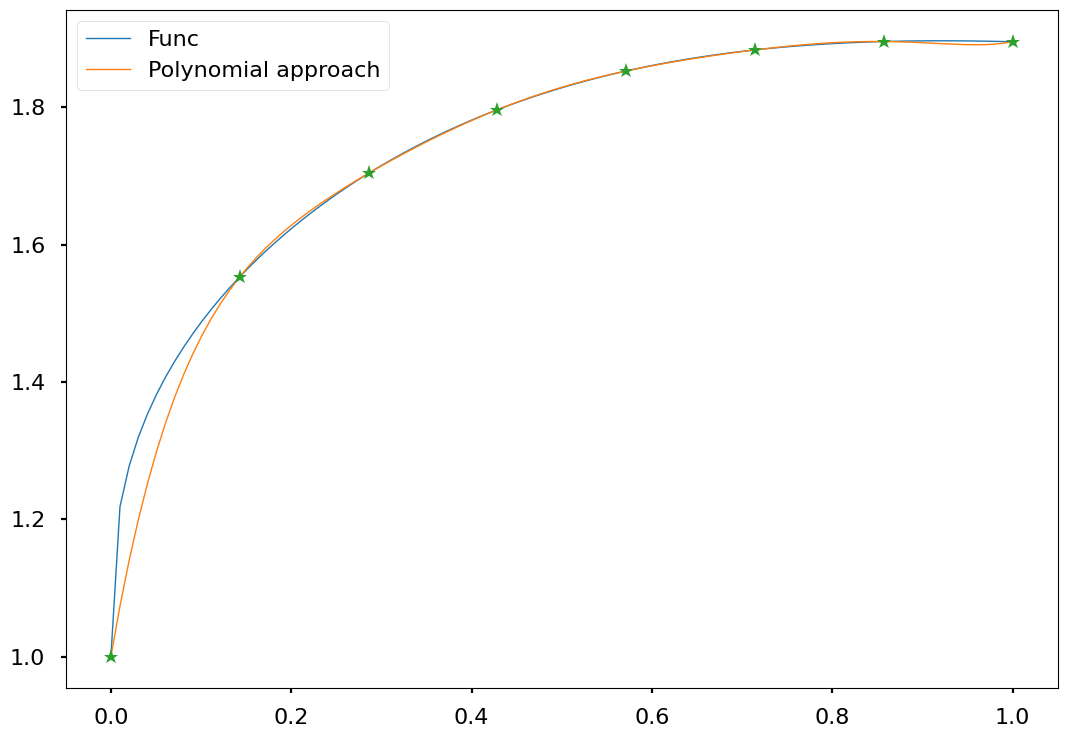

In [292]:

plt.plot(x, f(x), label="Func", linewidth=1)
plt.plot(x, polyno, label="Polynomial approach",linewidth=1)
plt.plot(ini,ans,'*' )
plt.legend()